# Predicción de sentimientos

## Lectura y preprocesamiento

In [1]:
import pandas as pd

path_file = r"C:\Users\chccr\Dropbox\Maestría MCD\MCD Procesamiento y clasificación de datos\Procesamiento-y-clasificaci-n-de-datos\HW2 Analisis de sentimientos\Hotel_Reviews.csv"
df = pd.read_csv(path_file)

df["Reviewer_Nationality"] = df["Reviewer_Nationality"].str.strip()
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### Seleccion de atributos para el modelo

In [2]:
df_reduced = df.iloc[:,[6,9,12]].copy()
df_reduced

,Negative_Review,Positive_Review,Reviewer_Score
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
1,No Negative,No real complaints the hotel was great great ...,7.5
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7
...,...,...,...
515733,no trolly or staff to help you take the lugga...,location,7.0
515734,The hotel looks like 3 but surely not 4,Breakfast was ok and we got earlier check in,5.8
515735,The ac was useless It was a hot week in vienn...,No Positive,2.5
515736,No Negative,The rooms are enormous and really comfortable...,8.8


### Formato de datos faltantes

In [3]:
df_reduced["Negative_Review"].mask(df_reduced["Negative_Review"] == "No Negative", "", inplace=True)
df_reduced["Positive_Review"].mask(df_reduced["Positive_Review"] == "No Positive", "", inplace=True)

In [4]:
print(df_reduced["Negative_Review"][df_reduced["Negative_Review"] == "No Negative"].shape)
print(df_reduced["Positive_Review"][df_reduced["Positive_Review"] == "No Positive"].shape)

(0,)
(0,)


### Union de reseñas positivas y negativas

In [5]:
df_reduced["Full_Review"] = df_reduced["Negative_Review"] + df_reduced["Positive_Review"]
df_reduced.drop(["Negative_Review", "Positive_Review"], axis=1, inplace=True)

In [6]:
df_reduced.head()

,Reviewer_Score,Full_Review
0,2.9,I am so angry that i made this post available...
1,7.5,No real complaints the hotel was great great ...
2,7.1,Rooms are nice but for elderly a bit difficul...
3,3.8,My room was dirty and I was afraid to walk ba...
4,6.7,You When I booked with your company on line y...


### Etiquetado de reseñas

In [7]:
def label_score(score):
    if score > 7.0:
        return "Positive"
    elif score <= 7.0:
        return "Negative"
    else:
        return "No label"

In [8]:
df_reduced["label"] = df_reduced["Reviewer_Score"].apply(label_score)
df_reduced.drop("Reviewer_Score",axis=1,inplace=True)
df_reduced

,Full_Review,label
0,I am so angry that i made this post available...,Negative
1,No real complaints the hotel was great great ...,Positive
2,Rooms are nice but for elderly a bit difficul...,Positive
3,My room was dirty and I was afraid to walk ba...,Negative
4,You When I booked with your company on line y...,Negative
...,...,...
515733,no trolly or staff to help you take the lugga...,Negative
515734,The hotel looks like 3 but surely not 4 Brea...,Negative
515735,The ac was useless It was a hot week in vienn...,Negative
515736,The rooms are enormous and really comfortable...,Positive


### Procesamiento de palabras

In [9]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop = set(stopwords.words('english'))
snow = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chccr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import re
def preprocesamiento_words(texto):
    """Preprocesamiento de palabras, retorna un listado de palabras con contexto.
    Retorna
    
    >>> Lista de palabras"""

    # Palabras a minusculas
    texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    texto = re.sub('http\S+', ' ', texto)
    # Removing Punctuations u otros caracteres
    texto = re.sub(r'[¿|?|!|\'|\"|#|:|“|”|_*]', r' ', texto)
    texto = re.sub(r'[.|,|)|(|\|/|\**|\-*]', r' ', texto)
    texto = re.sub(r'[\$\%\&\+\.\;\<\=\>\@\[\]\^_\`\{\|\}\~]', r' ', texto)
    # Eliminación de números
    texto = re.sub("\d+", ' ', texto)
    # Normaliza los espacios
    texto = re.sub(r' +', r' ', texto)

    # Separa oracion en palabras, remueve stopwords
    words = [snow.stem(word) for word in texto.split() if word not in stop]
    return words

In [11]:
preprocesamiento_words("https://sitioweb.com Nombre: Juan, Correo: juan.agsolano@gmail.com")

['nombr', 'juan', 'correo', 'juan', 'agsolano', 'gmail', 'com']

In [12]:
list_words = df_reduced["Full_Review"].apply(preprocesamiento_words)

In [13]:
list_text = list_words.apply(" ".join)
list_text

0         angri made post avail via possibl site use pla...
1         real complaint hotel great great locat surroun...
2         room nice elder bit difficult room two stori n...
3         room dirti afraid walk barefoot floor look cle...
4         book compani line show pictur room thought get...
                                ...                        
515733             trolli staff help take luggag room locat
515734    hotel look like sure breakfast ok got earlier ...
515735              ac useless hot week vienna gave hot air
515736    room enorm realli comfort believ famili member...
515737                   rd floor work free wife staff kind
Name: Full_Review, Length: 515738, dtype: object

### Vectorizacion de palabras

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

#Función tokenization
def tokenization(data, features=1200):
  count_vect = CountVectorizer(max_features=features)
  count_matrix = count_vect.fit_transform(data)
  count_array = count_matrix.toarray()
  tokens = pd.DataFrame(
      data=count_array, columns=count_vect.get_feature_names_out())
  voca = count_vect.vocabulary_
  return (tokens, voca)

In [15]:
tokens, voca = tokenization(list_text)

In [16]:
tokens.head(5)

,abl,absolut,ac,accept,access,accommod,accomod,account,across,activ,...,world,worn,worst,worth,would,wrong,year,yes,yet,young
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Forma final de datos

In [17]:
data = df_reduced.merge(tokens,how="left",left_index=True,right_index=True)
data.drop("Full_Review", axis=1, inplace=True)
data

,label,abl,absolut,ac,accept,access,accommod,accomod,account,across,...,world,worn,worst,worth,would,wrong,year,yes,yet,young
0,Negative,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515734,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515735,Negative,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515736,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### WordCloud

In [18]:
words_count = tokens.sum().sort_values(ascending=False)
words_count

room         392019
staff        236619
locat        214789
hotel        210641
breakfast    145626
              ...  
green           866
goe             865
nowher          864
smelli          863
outlet          863
Length: 1200, dtype: int64

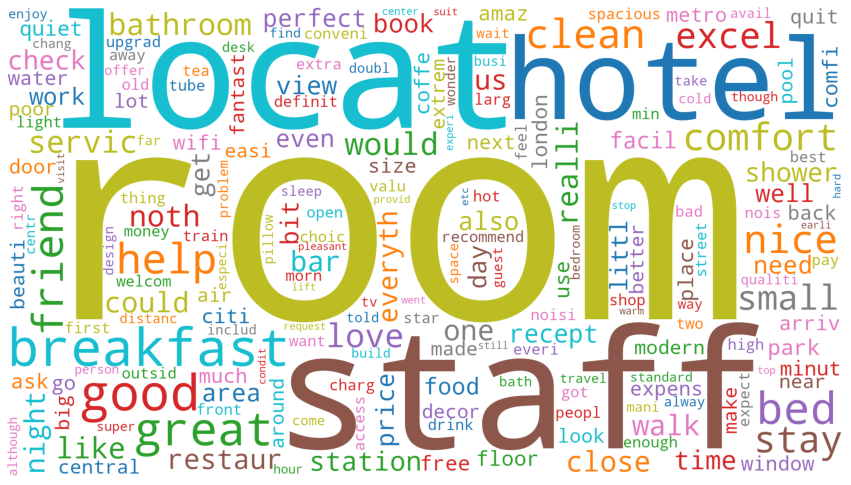

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=1920,
                      height=1080,
                      max_words=200,
                      background_color="white",
                      colormap="tab10").generate_from_frequencies(words_count)

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Muestreo de datos

In [22]:
data_sample = pd.concat([data[data["label"] == "Positive"].sample(n=10000),
                         data[data["label"] == "Negative"].sample(n=10000)])
data_sample

,label,abl,absolut,ac,accept,access,accommod,accomod,account,across,...,world,worn,worst,worth,would,wrong,year,yes,yet,young
213514,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28492,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404167,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272835,Positive,0,0,1,0,0,0,0,0,0,...,0,0,0,0,3,0,1,0,0,0
73185,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21743,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495187,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413980,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print('y-test size: {}'.format(len(data_sample)))
print('Negative: {}'.format(len(data_sample[data_sample["label"] == "Negative"])))
print('Positive: {}'.format(len(data_sample[data_sample["label"] == "Positive"])))

y-test size: 20000
Negative: 10000
Positive: 10000


In [24]:
data_sample.iloc[:,1:].sum().sort_values(ascending=False)

room         18278
hotel         9030
staff         8672
locat         8275
breakfast     5661
             ...  
map             24
generous        23
art             23
cathedr         21
histor          21
Length: 1200, dtype: int64

## Modelado de datos para clasificador

### Variable y (etiqueta)

In [25]:
from sklearn.preprocessing import label_binarize

y = label_binarize(data_sample["label"], classes=["Negative","Positive"])
y = y.T[0]

### Datos de entrada (caracteristicas)

In [26]:
X = data_sample.drop("label",axis=1)

## Modelo Clasificador Naive Bayes

### Particion de datos

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [28]:
pd.DataFrame([len(X), len(X_train), len(X_test)],
             index=['Total', 'Train', 'Test'],
             columns=['Size'])

,Size
Total,20000
Train,16000
Test,4000


### Seleccion del modelo

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

### Curvas de Aprendizaje - Tamaño de Muestra

In [30]:
import numpy as np
train_sizes_fraction = np.arange(0.10, 0.81, 0.05)
train_sizes = np.array(train_sizes_fraction*len(y_train)).astype(int)
print('Train sizes')
print(train_sizes)

Train sizes
[ 1600  2400  3200  4000  4800  5600  6400  7200  8000  8800  9600 10400
 11200 12000 12800]


In [31]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    gnb, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='f1')

In [32]:
cv_results = pd.DataFrame([np.round(train_sizes), np.mean(train_scores, axis=1), np.mean(valid_scores, axis=1)],
                          index=['Training size', 'Training F1-score', 'CV F1-score']).T
cv_results = cv_results.sort_values(by='CV F1-score', ascending=False)
cv_results

,Training size,Training F1-score,CV F1-score
13,12000.0,0.739252,0.722902
14,12800.0,0.737971,0.722282
12,11200.0,0.740946,0.721649
11,10400.0,0.741465,0.720576
10,9600.0,0.742081,0.720078
9,8800.0,0.743938,0.719818
7,7200.0,0.747698,0.718597
8,8000.0,0.743931,0.717913
6,6400.0,0.749625,0.716974
5,5600.0,0.754857,0.714683


In [33]:
cv_results["Training F1-score"].iloc[0]

0.7392516472601074

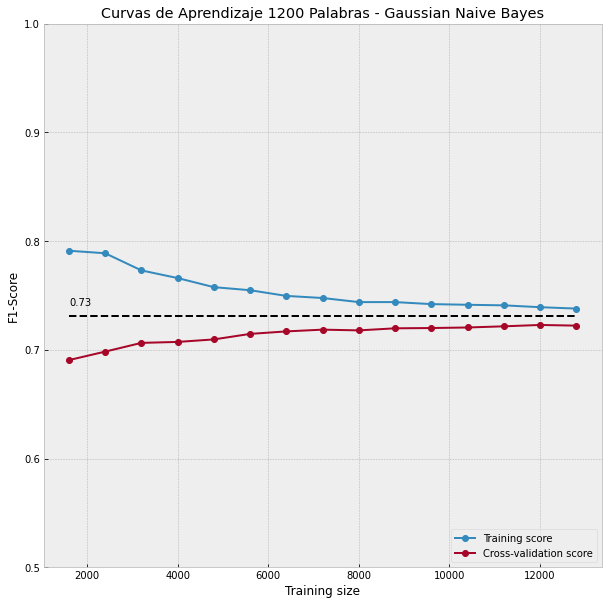

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.style.use('bmh')
plt.plot(train_sizes, np.mean(train_scores, axis=1),
         '-o', label='Training score',)
plt.plot(train_sizes, np.mean(valid_scores, axis=1),
         '-o', label='Cross-validation score')
plt.ylim((0.5, 1))
plt.legend(loc=4, frameon=True)
plt.xlabel('Training size')
plt.ylabel('F1-Score')
plt.title('Curvas de Aprendizaje 1200 Palabras - Gaussian Naive Bayes')
convergence = np.mean([cv_results["Training F1-score"].iloc[0], cv_results["CV F1-score"].iloc[0]])
plt.hlines(convergence,train_sizes[0],train_sizes[-1], linestyles="dashed", colors="black")
plt.annotate("{:0.2f}".format(convergence),xy=(train_sizes[0],convergence+0.01))
plt.show()

In [ ]:
from sklearn.metrics import f1_score
gnb.fit(X_train, y_train)
print('F1 score: {:4.2f} %'.format(f1_score(y_test, gnb.predict(X_test))*100))

F1 score: 73.79 %


In [39]:
data["label"].value_counts()

Positive    428476
Negative     87262
Name: label, dtype: int64

In [56]:
428476/(428476+87262)

0.8308016861274523

In [ ]:
y_all = label_binarize(data["label"],classes=["Negative","Positive"])
y_all = y_all.T[0]
print('F1 score: {:4.2f} %'.format(f1_score(y_all, gnb.predict(data.iloc[:,1:]))*100))

F1 score: 86.12 %


### Curvas de Aprendizaje - Numero de Palabras

9/9

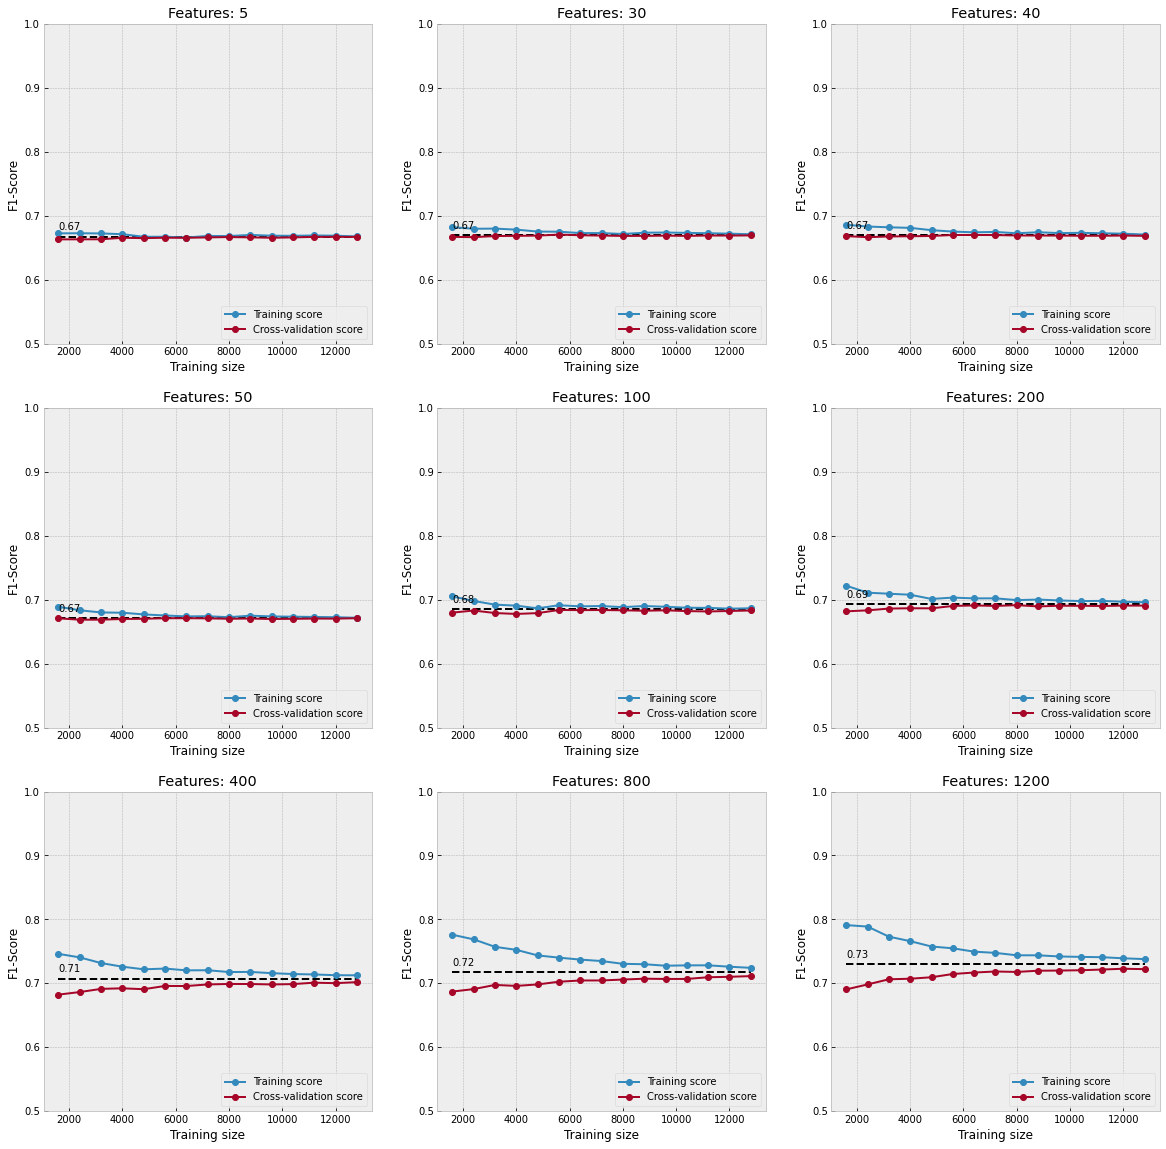

In [47]:
import matplotlib.pyplot as plt

iterat = [5,30,40,50,100,200,400,800,1200]
best_models = np.zeros((len(iterat), 4))
counter = 0

plt.figure(figsize=(20, 20))
plt.style.use('bmh')

for n_features in iterat:
  #Cross-Validation for n features
  print('\r{}/{}'.format(counter+1, len(iterat)), end='')
  (train_sizes, train_scores, valid_scores,
   fit_time, score_time) = learning_curve(gnb, X_train.iloc[:, 0:n_features],
                                          y_train, train_sizes=train_sizes,
                                          cv=5, scoring='f1', return_times=True)

  cv_results = pd.DataFrame([np.round(train_sizes), np.mean(train_scores, axis=1),
                             np.mean(valid_scores, axis=1), np.mean(
      fit_time, axis=1),
      np.mean(score_time, axis=1)],
      index=['Training size', 'Training scores', 'CV scores', 'Fit time', 'Score time']).T
  #Learning curves
  plt.subplot(3, 3, counter+1)
  plt.plot(train_sizes, np.mean(train_scores, axis=1),
           '-o', label='Training score',)
  plt.plot(train_sizes, np.mean(valid_scores, axis=1),
           '-o', label='Cross-validation score')
  plt.ylim((0.5, 1))
  plt.legend(loc=4, frameon=True)
  plt.xlabel('Training size')
  plt.ylabel('F1-Score')
  plt.title('Features: {}'.format(n_features))
  convergence = np.mean([cv_results["Training scores"].iloc[-1], cv_results["CV scores"].iloc[-1]])
  plt.hlines(convergence,train_sizes[0],train_sizes[-1],linestyles="dashed",colors="black")
  plt.annotate("{:0.2f}".format(convergence),
               xy=(train_sizes[0], convergence+0.01))

  #Extract best CV Score
  best_models[counter, 0] = n_features
  best_models[counter, 1] = cv_results[cv_results['CV scores']
                                       == cv_results['CV scores'].max()]['CV scores']
  best_models[counter, 2] = cv_results[cv_results['CV scores']
                                       == cv_results['CV scores'].max()]['Fit time']
  best_models[counter, 3] = cv_results[cv_results['CV scores']
                                       == cv_results['CV scores'].max()]['Score time']
  counter += 1

In [48]:
best_models = pd.DataFrame(best_models,
                           columns=['Features', 'CV F1-scores', 'Fit time', 'Score time'])
best_models

,Features,CV F1-scores,Fit time,Score time
0,5.0,0.667311,0.003400,0.001600
1,30.0,0.670860,0.004200,0.002001
2,40.0,0.670260,0.006001,0.002400
3,50.0,0.671033,0.012399,0.004400
4,100.0,0.683907,0.011399,0.008800
5,200.0,0.691440,0.036200,0.016601
6,400.0,0.701947,0.141799,0.031400
7,800.0,0.711397,0.281141,0.054401
8,1200.0,0.722902,0.333999,0.093401


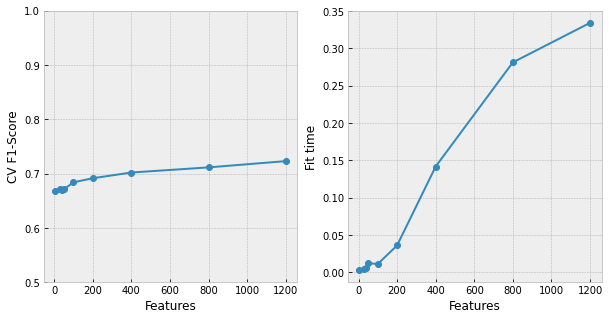

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(best_models['Features'], best_models['CV F1-scores'], '-o')
plt.xlabel('Features')
plt.ylabel('CV F1-Score')
plt.ylim(0.5,1)

plt.subplot(1, 2, 2)
plt.plot(best_models['Features'], best_models['Fit time'], '-o')
plt.xlabel('Features')
plt.ylabel('Fit time')
plt.show()

In [51]:
print('y-test size: {}'.format(len(y_test)))
print('Negative: {}'.format(len(y_test)-sum(y_test)))
print('Positive: {}'.format(sum(y_test)))

y-test size: 4000
Negative: 2022
Positive: 1978


### Desempeño sobre todo el modelo

In [52]:
gnb.fit(X_train, y_train)

GaussianNB()

In [53]:
predictions = gnb.predict(data.iloc[:,1:])
y_all = label_binarize(data["label"], classes=["Negative", "Positive"])
y_all = y_all.T[0]

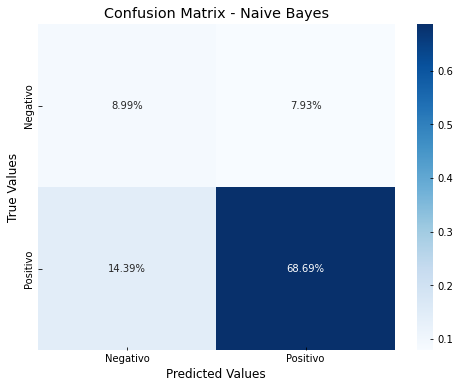

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and plot confusion matrix
cm = confusion_matrix(y_all, predictions)/len(y_all)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="0.2%")
ax.set_title("Confusion Matrix - Naive Bayes")

ax.set_xlabel("Predicted Values")
ax.set_ylabel("True Values")

ax.xaxis.set_ticklabels(["Negativo", "Positivo"])
ax.yaxis.set_ticklabels(["Negativo", "Positivo"])
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Metrics for best model')
print('Accuracy: {:.2f}%'.format(accuracy_score(y_all, predictions)*100))
print('Precision: {:.2f}%'.format(precision_score(y_all, predictions)*100))
print('Recall: {:.2f}%'.format(recall_score(y_all, predictions)*100))
print('F1 score: {:.2f}%'.format(f1_score(y_all, predictions)*100))

Metrics for best model
Accuracy: 77.68%
Precision: 89.65%
Recall: 82.68%
F1 score: 86.03%


## Clasificador Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200, min_samples_leaf=20,n_jobs=-1)

clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=200, n_jobs=-1)

### Desempeño del modelo

In [58]:
y_pred = clf.predict(data.iloc[:,1:])

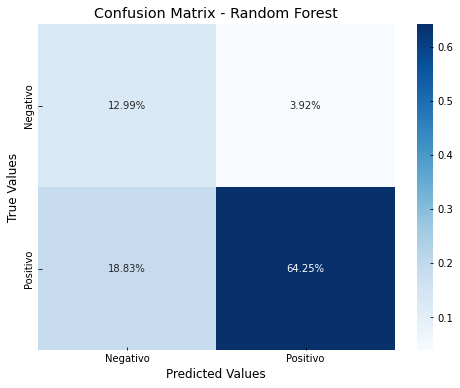

In [61]:
# Create and plot confusion matrix
cm = confusion_matrix(y_all, y_pred)/len(y_all)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="0.2%")
ax.set_title("Confusion Matrix - Random Forest")

ax.set_xlabel("Predicted Values")
ax.set_ylabel("True Values")

ax.xaxis.set_ticklabels(["Negativo", "Positivo"])
ax.yaxis.set_ticklabels(["Negativo", "Positivo"])
plt.show()

In [60]:
print('Metrics for best model')
print('Accuracy: {:.2f}%'.format(accuracy_score(y_all, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_all, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_all, y_pred)*100))
print('F1 score: {:.2f}%'.format(f1_score(y_all, y_pred)*100))

Metrics for best model
Accuracy: 77.25%
Precision: 94.24%
Recall: 77.34%
F1 score: 84.96%


### Importancia de atributos

In [ ]:
features_importance = pd.DataFrame(clf.feature_importances_, index=X_test.columns).sort_values(by=0,ascending=False)
features_importance = features_importance.rename({0:"Importancia"}, axis=1)
features_importance[:20]

,Importancia
great,0.076626
excel,0.055175
room,0.046736
love,0.043841
poor,0.040368
small,0.034025
comfort,0.027907
friend,0.027904
dirti,0.025743
help,0.025680


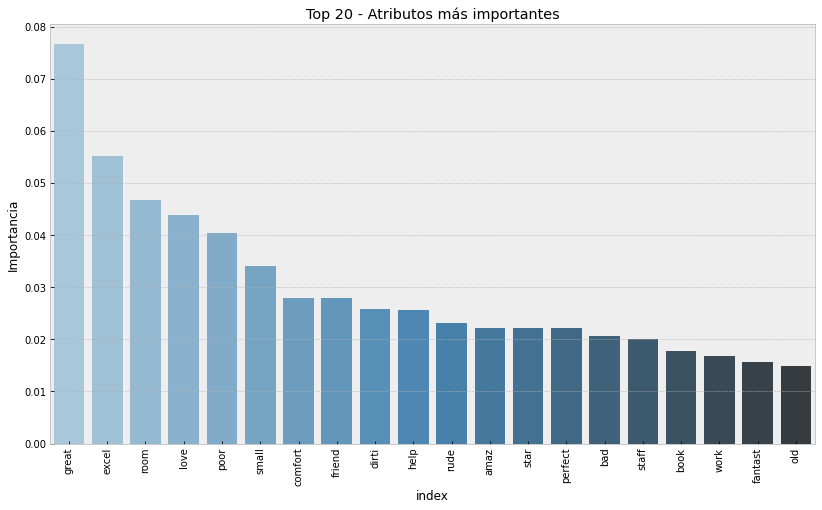

In [ ]:
plt.figure(figsize=(19.2/1.4, 10.80/1.4))
sns.barplot(x="index", y="Importancia",
            data=features_importance[:20].reset_index(), palette="Blues_d")
plt.title("Top 20 - Atributos más importantes")
plt.xticks(rotation=90)
plt.show()

## Comparacion de modelos

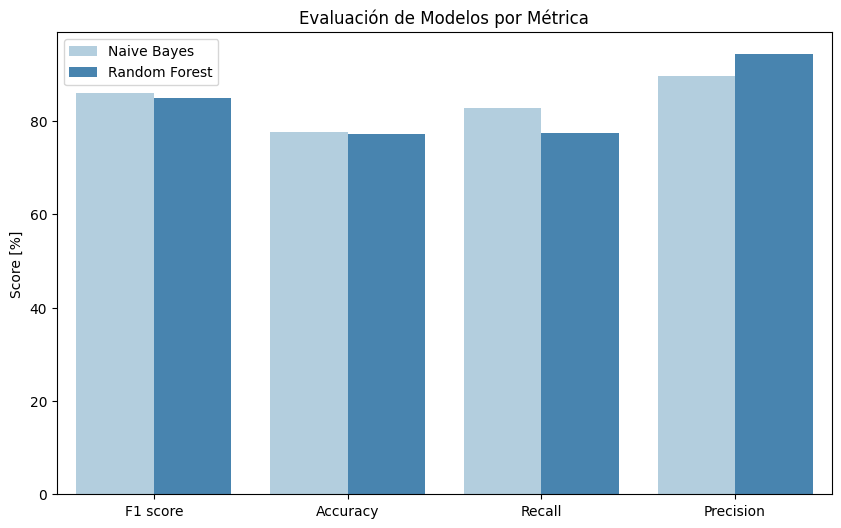

In [67]:
x = ["Naive Bayes", "Random Forest"]
plt.style.use("default")
data = pd.DataFrame({"Modelos": x,
                     "F1 score": [86.03,84.96],
                     "Accuracy": [77.68,77.25],
                     "Recall": [82.68,77.34],
                     "Precision": [89.65,94.24]})
data = data.melt(id_vars="Modelos", value_vars=[
                 "F1 score", "Accuracy", "Recall", "Precision"], value_name="Score", var_name="Metric")

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Modelos", data=data, palette="Blues")
plt.title("Evaluación de Modelos por Métrica")
plt.legend(loc=0)
plt.ylabel("Score [%]")
plt.xlabel("")
plt.show()